# Prawdopodobieństwo

### Zależność i niezależość

Zdarzenia E i F są zależne od siebie, jeżeli wiedza o zdarzeniu E pozwala nam przewidzeć wystąpienie zdarzenia F i na odwrót. W przeciwnym przypadku zdarzenia są niezależne.

Z punktu widzenia matematuki mówimy, że zdarzenia E i F są niezależne, jeżeli prawdopodobieństwo wystąpienia tych dwóch zdarzeń jest iloczynem prawdopodobieństwa wystąpienia każdego z nich:

P(E∩F)=P(E)P(F)

### Prawdopodobieństwo warunkowe

Jeżeli zdarzenia E i F są niezależne, to zgodnie z definicją zachodzi równość:

P(E∩F)=P(E)P(F)

Jeżeli te zdarzenia nie muszą być niezależne (i jeżeli prawdopodobieństwo zdarzenia F nie jest zerowe) to prawdopodobieństwo zdarzenia E uwarunkowanego zdarzeniem F można opisać za pomocą wzoru:

P(E|F)=P(E∩F)/P(F)

Można to również zapisać w postaci:

P(E∩F)=P(E|F)/P(F)

Gdy zdarzenia są niezależne

P(E|F)=P(E)

Przykład rodziny z dwójką dzieci o nieznanej dla nas płci.
Jeżeli założymy, że: 
1. Prawdopodobieństwo tego, że każde z dzieci jest chłopcem, jest równe prawdopodobieństwu tego, że kazde z nich jest dziewczynką
2. Płeć drugiego dziecka nie zależy od płci pierwszego dziecka.

Wówczas prawdopodobieństwo zdarzenia polegającego na tym, że żadne z dzieci nie jest dziewczynką, wynosi 1/4, prawdopodobieństwo, że jedno z dzieci jest dziewczynką, a drugie chłopcem wynosi 1/2, a prawdopodobieństwo wystąpienia dwóch dziewczynek wynosi 1/4.

Teraz możemy określić prawdopodobieństwo tego, że obydwoje dzieci jest płci żeńskiej (D), pod takim warunkiem, że starsze dziecko jest dziewczynką (S). Z definicji prawdopodobieństwa warunkowego wynika, że:

P(D|S)=P(D∩S)/P(S)=P(D)/P(S)=1/2

Wynika to stąd, że prawdopodobieństwo zdarzenia D∩S (obydwoje dzieci jest płci żeńskiej i starsze dziecko jest dziewczynką) jest równe prawdopodobieństwu zdarzenia D (jeśli obydwoje dzieci jest płci żeńskiej, to starsze dziecko musi być dziewczynką).

Teraz spróbujmy określić prawdopodobieństwo zdarzenia, że obydwoje dzieci jest płci żeńskiej, pod warunkiem że przynajmniej jedno z dzieci jest dziewczynką (J). 

Prawdopodobieństwo wystąpienia zdarzenia D i J (obydwoje dzieci jest płci żeńskiej i przynajmniej jedno z dzieci jest płci żeńskiej ) jest równe prawdopodobieństwu zdarzenia D, a więc:

P(D|J)=P(D∩J)/P(J)=P(D)/P(J)=1/3

Jeżeli wiemy tylko, że jedno z dzieci jest płci żeńskiej, to prawdopodobieństwo tego, że jedno dziecko jest chłopcem, a drugie dziewczynką, jest dwukrotnie większe od tego, że obydwoje dzieci to dziewczynki. 

In [1]:
import enum, random
# Enum jest zbiorem wartości typu enumerated. Możemy użyć ich, aby kod był bardziej czytelny.

class Kid(enum.Enum):
    BOY = 0
    GIRL = 1
    
def random_kid():
    return random.choice([Kid.BOY, Kid.GIRL])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == Kid.GIRL:
        older_girl += 1
    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girls += 1
    if older == Kid.GIRL or younger == Kid.GIRL:
        either_girl += 1

print("P(obydwoje | starsze):", both_girls / older_girl)                 # 0.514 --> close to 1/2
print("P(obydwoje | którekolwiek):", both_girls / either_girl)               # 0.342 --> close to 1/3

P(obydwoje | starsze): 0.5007089325501317
P(obydwoje | którekolwiek): 0.3311897106109325


### Twierdzenie Bayesa

Załóżmy, że chcemy określić prawdopodobieństwo jakiegoś zdarzenia E, którego wystąpienie zależy od zdarzenia F, ale znamy tylko prawdopodobieństwo wystąpienia zdarzenia F pod warunkiem wystąpienia zdarzenia E. Dwukrotne zastosowanie definicji prawdopodobieństwa warunkowego pozwala na uzyskanie następującego wzoru:

P(E|F)=P(E∩F)/P(F)=P(F|E)P(E)/P(F)

Zdarzenie F można podzielić na dwa wzajemnie wykluczające się zdarzenia: "F i E" oraz "F i nie E". Jeżeli wyrażenie "nie E" zapiszemy za pomocą ~E, to:

P(F)=P(F∩E) + P(F∩~E)

z czego wynika:

P(E|F)=P(F|E)P(E)/[P(F|E)P(E)+P(F|~ E)P(~  E)]

Załóżmy, że pewna choroba atakuje 1 na 10000 ludzi. Ponadto załóżmy, że istnieje test sprawdzający tę chorobę dający poprawny rezultat ("chory", jeżeli pacjent cierpi na to schorzenie, a "zdrowy", gdy pacjent na nie nie cierpi) w 99% przypadków.

Literą W oznaczamy zdarzenie polegające na uzyskaniu "pozytywnego wyniku testu", a literą C zdarzenie polegajace na uzyskaniu wyniku "jesteś chory". Wówczas prawdopodobieństwo tego, że jesteś chory pod warunkiem pozytywnego wyniku testu wynosi:

P(C|W)=P(W|C)P(C)/[P(W|C)P(C)+P(W|~ C)P(~ C)]

Prawdopodobieństwo tego, że ktoś chory uzyska pozytywny wynik testu P(W|C) wynosi 0,99. Prawdopodobieństwo tego, że dowolna wylosowana osobą jest chora P(C) wynosi 0,0001. Prawdopodobieństwo tego, że osoba zdrowa uzyska pozytywny wynik P(W|~ C) wynosi
0,01. Prawdopodobieństwo tego, że dowolna wylosowana osoba jest zdrowa P(~ C) wynosi 0,9999. A więc P(C|W)=0,98%. W związku z tym mniej niż 1% osób uzyskujących wynik pozytywny jest tak naprawdę chorych.

### Zmienne losowe

Zmienna losowa to zmienna, której wartości są zgodne z jakimś rozkładem prawdopodobieństwa. Bardzo prosta zmienna losowa przyjmuje wartość 1, gdy w wyniku rzutu monetą wypadnie orzeł, a wartość 0, gdy wypadnie reszka. Bardziej złożona zmienna losowa moze określać liczbę wyrzucenia orła podczas dziesięciokrotnego rzutu monetą lub liczbę wybraną z zakresu range(10) (przy czym wygenerowanie każdej z wartości jest tak samo prawdopodobne).

Rozkład prawdopodobieństwa określa prawdopodobieństwo przyjęcia przez zmienną każdej z możliwych wartości. W przypadku zmiennej, której wartość ustalana jest w wyniku rzutu monetą, prawdopodobieństwo tego, że zmienna ta przyjmnie wartość równą 0, wynosi 0,5 (tyle samo wynosi prawdopodobieństwo tego, że zmienna ta przymnie wartość 1). Zmienna range(10) charakteryzuje się rozkładem 0,1.

Wartości zmiennych losowych mogą zależeć od warunków, podobnie jak zdarzenia.
Z przykładu rodziny z dwójką dzieci: jeżeli X jest zmienną określającą liczbę dziewcząt, to prawdopodobieństwo tego ,ze X=0 wynosi 1/4, tego że X=1 wynosi 1/2 a tego, że X=2 wynosi 1/4.

### Ciągły rozkład prawdopodobieństwa

Rzut monetą zaliczamy do dyskretnego rozkładu prawdopodobieństwa - rozkład ten przyporządkowuje dodatnie wartości prawdopodobieństwa do dyskretnych wyników. 
Rozkład jednostajny dyskretny przypisuje równe wagi do wszystkich wartości znajdujących się pomiędzy liczbami 0 i 1. 

Pomiędzy liczbami 0 a 1 znajduje się nieskończenie wiele wartości, a więc waga przypisywana do poszczególnych punktów musi być koniecznie zerowa. W związku z tym rozkład ciągły przedstawiamy za pomocą funkcji gęstości prawdopodobieństwa (funkcji gęstości zmiennej losowej), według której prawdopodobieństwo wystąpienia wartości w pewnym interwale jest równe całce funkcji gęstości w tym interwale. 

In [2]:
# Funkcja gęstości w przypadku rozkładu jednostajnego 
def uniform_pdf(x: float) -> float:
    return 1 if  0 <= x < 1 else 0    

In [3]:
# Dystrybuanta rozkładu - określa prawdopodobieństwo tego, że wartość zmiennej losowej jest mniejsza od określonej wartości lub
# jej równa

def uniform_cdf(x: float) -> float:
    """Zwraca prawdopodobieństwo tego, że zmienna rozkładu jednostajnego jest <= x."""
    if x < 0:   return 0    # Rozkład jednostajny nigdy nie przyjmuje wartości mniejszych od 0,
    elif x < 1: return x    # np. P(X <= 0,4) = 0,4.
    else:       return 1    # Liczba wylosowana z rozkładu jednostajnego jest zawsze mniejsza od 1.

### Rozkład normalny

Zależy od dwóch parametrów: Średniej  i odchylenia standardowego. Średnia określa punkt, w którym znajduje się środek dzwonu, a odchylenie standardowe decyduje o jego szerokości.

In [4]:
import math
SQRT_TWO_PI = math.sqrt(2 * math.pi)

def normal_pdf(x: float, mi: float = 0, sigma: float = 1) -> float:
    return (math.exp(-(x-mi) ** 2 / 2 / sigma ** 2) / (SQRT_TWO_PI * sigma))

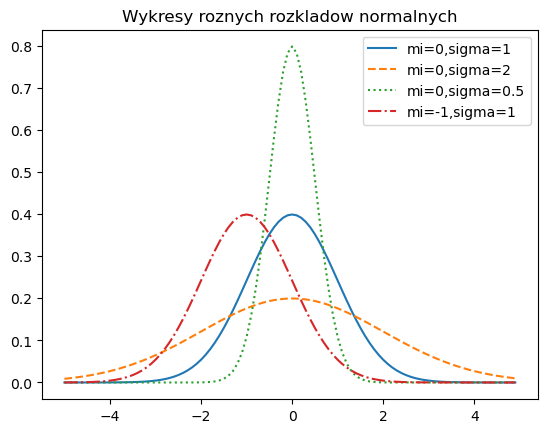

In [5]:
# Wykres różnych rozkładów normalnych
import matplotlib.pyplot as plt
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mi=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mi=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mi=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mi=-1)   for x in xs],'-.',label='mi=-1,sigma=1')
plt.legend()
plt.title("Wykresy roznych rozkladow normalnych")
plt.show()

In [6]:
# Dystrybuanta rozkładu

def normal_cdf(x: float, mi: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mi) / math.sqrt(2) / sigma)) / 2

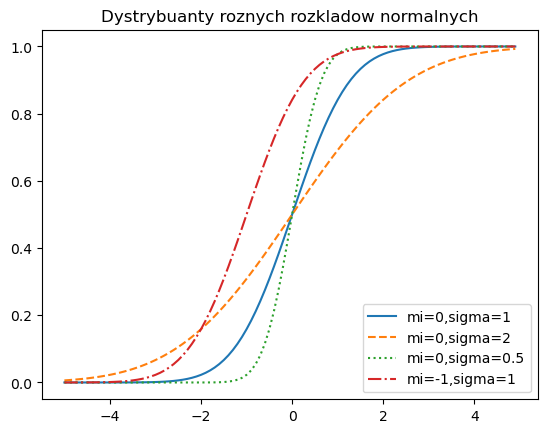

In [7]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mi=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mi=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mi=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mi=-1) for x in xs],'-.',label='mi=-1,sigma=1')
plt.legend(loc=4) # prawy dolny róg
plt.title("Dystrybuanty roznych rozkladow normalnych")
plt.show()

In [8]:
# Odwrotność dystrybuanty rozkładu narmalnego
def inverse_normal_cdf(p: float,
                       mi: float = 0,
                       sigma: float = 1,
                       tolerance: float = 0.00001) -> float:
    """Znajduje przybliżoną wartość odwrotności przy użyciu algorytmu wyszukiwania binarnego."""

    # Jeżeli rozkład nie jest standardowy, to oblicz jego standardową postać i przeskaluj.
    if mi != 0 or sigma != 1:
        return mi + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z = -10.0                      # normal_cdf(-10) ma wartość (zbliżoną do) 0
    hi_z  =  10.0                      # normal_cdf(10)  ma wartość (zbliżoną do) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # Weź pod uwagę punkt środkowy
        mid_p = normal_cdf(mid_z)      # i znajdującą się tam wartość dystrybuanty.
        if mid_p < p:
            low_z = mid_z              # Punkt środkowy znajduje się za nisko, szukaj nad nim.
        else:
            hi_z = mid_z               # Punkt środkowy znajduje się za wysoko, szukaj pod nim.

    return mid_z

### Centralne twierdzenie graniczne

Zmienna losowa zdefiniowana jako średnia wielu niezależnych zmiennych losowych o takim samych rozkładzie ma rozkład zbliżony do normalnego.

In [9]:
# Zmienna losowa w postaci dwumianu (n,p) jest sumą n niezależnych zmiennych losowych Bernoulliego (p), z których każda jest 
# równa 1 z prawdopodobieństwem p i równa 0 z prawdopodobieństwem równym 1-p
import random

def bernoulli_trial(p: float) -> int:
    """Zwraca 1 z prawdopodobieństwem p i 0 z prawdopodobieństwem 1-p"""
    return 1 if random.random() < p else 0

def binomial(n: int, p: float) -> int:
    """Zwraca sumę n prób Bernoulliego(p)"""
    return sum(bernoulli_trial(p) for _ in range(n))

In [10]:
from collections import Counter

def make_hist(p: float, n: int, num_points: int) -> None:
    """Rysuje histogram punktów z dwumianu(n, p)"""
    data = [binomial(n, p) for _ in range(num_points)]

    # Próbki dwumianu przedstaw na wykresie słupkowym.
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')

    mi = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # Przybliżenie rozkładu normalnego przedstaw na wykresie liniowym
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mi, sigma) - normal_cdf(i - 0.5, mi, sigma)
          for i in xs]
    plt.plot(xs,ys)
    plt.title("Rozklad dwumianu a przyblizenie rozkladu normalnego")
    plt.show()

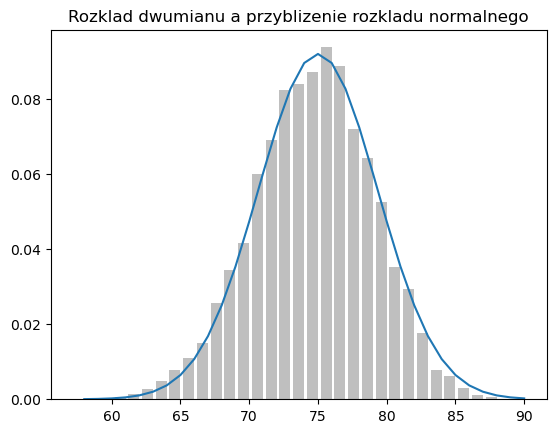

In [12]:
make_hist(0.75, 100, 10000)